In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [2]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
SSP1_26_o2=google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
SSP1_26_o2

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15681,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [5]:
SSP1_26_o2sat=google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
SSP1_26_o2sat

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15679,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [6]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore_SSP1_26_o2sat = SSP1_26_o2sat.zstore.values[-1]
zstore_SSP1_26_o2 = SSP1_26_o2.zstore.values[-1]

In [7]:
# create a mutable-mapping-style interface to the store
mapper_SSP1_26_o2sat = gcs.get_mapper(zstore_SSP1_26_o2sat)
mapper_SSP1_26_o2 = gcs.get_mapper(zstore_SSP1_26_o2)

In [8]:
# open the dataset using xarray and zarr
O2sat_SSP126 = xr.open_zarr(mapper_SSP1_26_o2sat, 
                                consolidated=True,use_cftime=True).o2sat
O2_SSP126 = xr.open_zarr(mapper_SSP1_26_o2, 
                                consolidated=True,use_cftime=True).o2

In [9]:
O2sat_SSP126

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [10]:
O2sat=O2sat_SSP126.rename({'lat':'latitude','lon':'longitude'})
O2sat

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [11]:
O2_SSP126

<xarray.DataArray 'o2' (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [12]:
O2=O2_SSP126.rename({'lat':'latitude','lon':'longitude'})
O2

<xarray.DataArray 'o2' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [13]:
SSP126_AOU=O2_SSP126-O2sat_SSP126
SSP126_AOU

<xarray.DataArray (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [14]:
AOU=SSP126_AOU.rename({'lat':'latitude','lon':'longitude'})
AOU

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [15]:
#importing basin masks
esm4_basins = xr.open_dataset('../data/basins/esm4_basins_gr.nc').basins

Text(0.5, 1.0, 'Ocean Basin Mask')

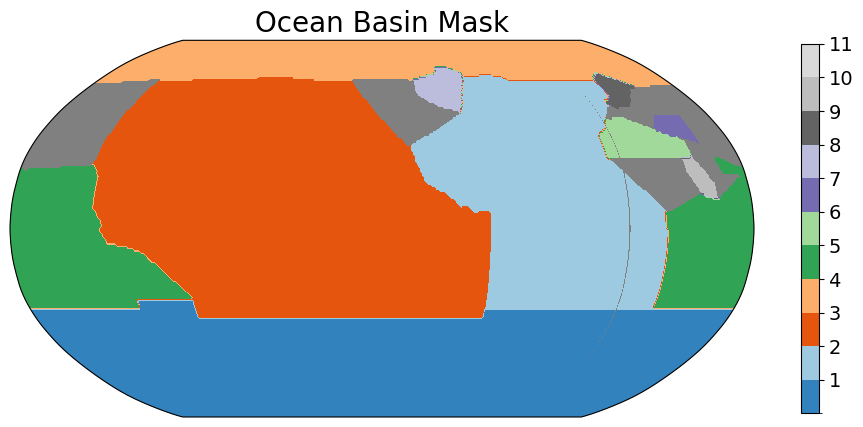

In [16]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [17]:
southernocean = (esm4_basins.where(esm4_basins==1) / esm4_basins.where(esm4_basins==1))
atlanticocean = (esm4_basins.where(esm4_basins==2) / esm4_basins.where(esm4_basins==2))
pacificocean = (esm4_basins.where(esm4_basins==3) / esm4_basins.where(esm4_basins==3))
arcticocean = (esm4_basins.where(esm4_basins==4) / esm4_basins.where(esm4_basins==4))
indianocean = (esm4_basins.where(esm4_basins==5) / esm4_basins.where(esm4_basins==5))

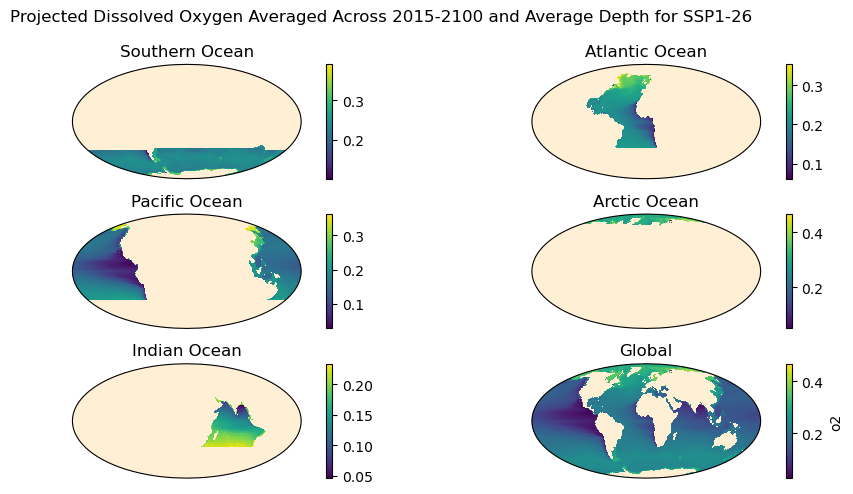

In [35]:
subplot_kws=dict(projection=ccrs.Mollweide(),
                 facecolor='papayawhip')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)
(O2*southernocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,0],
                              transform=ccrs.PlateCarree())
(O2*atlanticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,1],
                                transform=ccrs.PlateCarree())
(O2*pacificocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,0],
                              transform=ccrs.PlateCarree())
(O2*arcticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,1],
                              transform=ccrs.PlateCarree())
(O2*indianocean).mean(dim='lev').mean(dim='time').plot(ax=ax[2,0],
                              transform=ccrs.PlateCarree())
O2.mean(dim='lev').mean(dim='time').plot(ax=ax[2,1],
                              transform=ccrs.PlateCarree())

ax[0,0].set_title('Southern Ocean')
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

fig.suptitle('Projected Dissolved Oxygen Averaged Across 2015-2100 and Average Depth for SSP1-26')
plt.tight_layout()

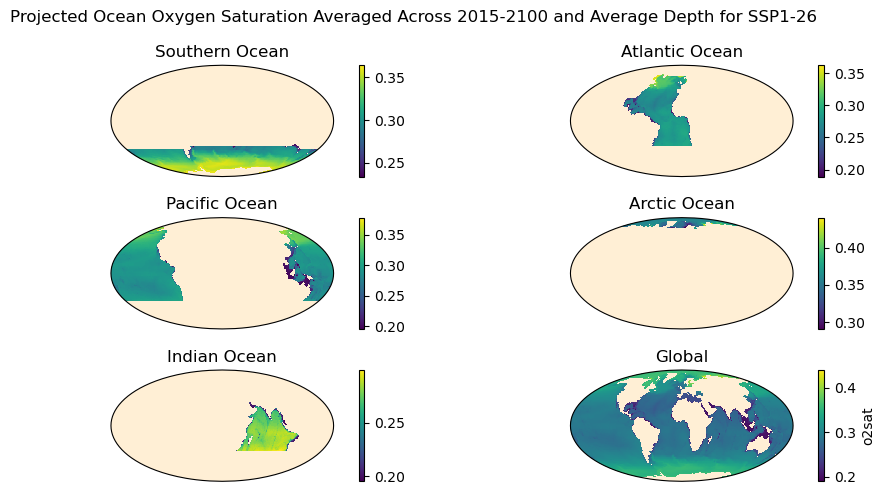

In [36]:
subplot_kws=dict(projection=ccrs.Mollweide(),
                 facecolor='papayawhip')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)
(O2sat*southernocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,0],
                              transform=ccrs.PlateCarree())
(O2sat*atlanticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,1],
                                transform=ccrs.PlateCarree())
(O2sat*pacificocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,0],
                              transform=ccrs.PlateCarree())
(O2sat*arcticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,1],
                              transform=ccrs.PlateCarree())
(O2sat*indianocean).mean(dim='lev').mean(dim='time').plot(ax=ax[2,0],
                              transform=ccrs.PlateCarree())
O2sat.mean(dim='lev').mean(dim='time').plot(ax=ax[2,1],
                              transform=ccrs.PlateCarree())

ax[0,0].set_title('Southern Ocean')
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

fig.suptitle('Projected Ocean Oxygen Saturation Averaged Across 2015-2100 and Average Depth for SSP1-26')
plt.tight_layout()

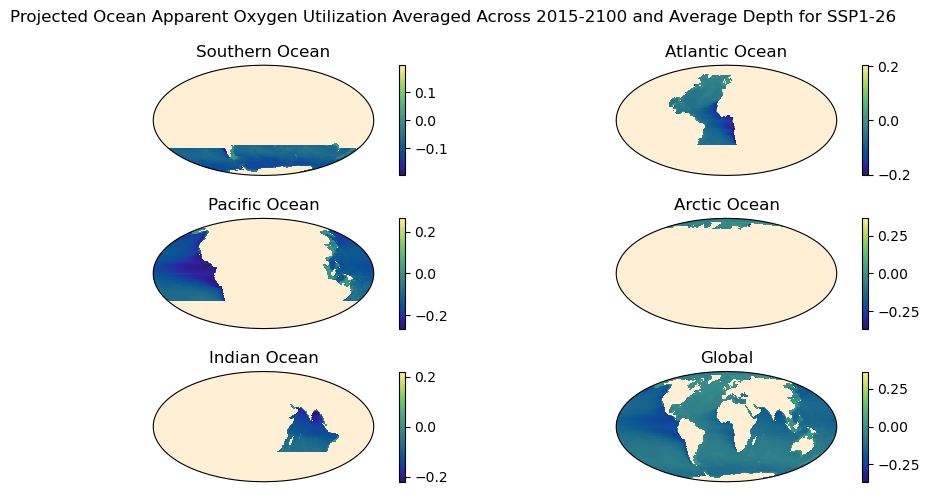

In [37]:
subplot_kws=dict(projection=ccrs.Mollweide(), 
                 facecolor='papayawhip')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)
(AOU*southernocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,0], cmap=cmocean.cm.haline,
                              transform=ccrs.PlateCarree())
(AOU*atlanticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,1], cmap=cmocean.cm.haline,
                                transform=ccrs.PlateCarree())
(AOU*pacificocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,0], cmap=cmocean.cm.haline,
                              transform=ccrs.PlateCarree())
(AOU*arcticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,1], cmap=cmocean.cm.haline, 
                              transform=ccrs.PlateCarree())
(AOU*indianocean).mean(dim='lev').mean(dim='time').plot(ax=ax[2,0], cmap=cmocean.cm.haline, 
                              transform=ccrs.PlateCarree())
AOU.mean(dim='lev').mean(dim='time').plot(ax=ax[2,1], cmap=cmocean.cm.haline,
                              transform=ccrs.PlateCarree())

ax[0,0].set_title('Southern Ocean')
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

fig.suptitle('Projected Ocean Apparent Oxygen Utilization Averaged Across 2015-2100 and Average Depth for SSP1-26')
plt.tight_layout()

In [21]:
avgO2=O2.mean(dim='lev').mean(dim='longitude').mean(dim='latitude')

In [22]:
avgO2_2015=avgO2.sel(time=slice('2015-01-16','2015-12-16')).groupby('time.month').mean(dim='time')

In [23]:
avgO2_2050=avgO2.sel(time=slice('2050-01-16','2050-12-16')).groupby('time.month').mean(dim='time')

In [24]:
avgO2_2100=avgO2.sel(time=slice('2100-01-16','2100-12-16')).groupby('time.month').mean(dim='time')

In [25]:
avgO2_15_100=avgO2.groupby('time.month').mean(dim='time')
stdO2_15_100=avgO2.groupby('time.month').std(dim='time')

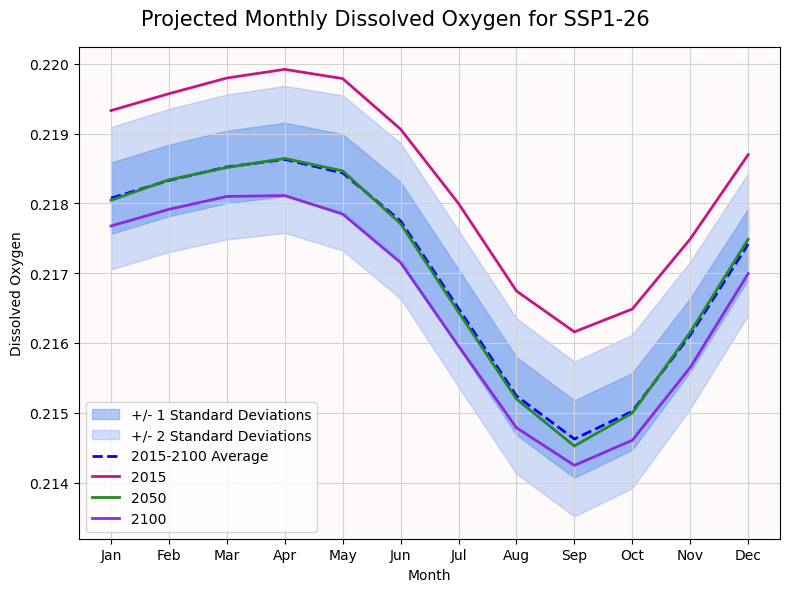

In [38]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Projected Monthly Dissolved Oxygen for SSP1-26', fontsize=15)

ax.grid(color='lightgrey')

ax.fill_between(avgO2_15_100['month'], avgO2_15_100+stdO2_15_100,avgO2_15_100-stdO2_15_100, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='cornflowerblue')
ax.fill_between(avgO2_15_100['month'], avgO2_15_100+(2*stdO2_15_100),avgO2_15_100-(2*stdO2_15_100), 
                label='+/- 2 Standard Deviations',alpha=0.3, color='cornflowerblue')
ax.plot(avgO2_15_100['month'], 
        avgO2_15_100, linewidth=2, linestyle='--',
        label='2015-2100 Average', color='blue')

ax.plot(avgO2_2015['month'], avgO2_2015, linewidth=2, label='2015', color='mediumvioletred')
ax.plot(avgO2_2050['month'], avgO2_2050, linewidth=2, label='2050', color='forestgreen')
ax.plot(avgO2_2100['month'], avgO2_2100, linewidth=2, label='2100', color='blueviolet')

ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.legend()
ax.set_ylabel('Dissolved Oxygen')
ax.set_xlabel('Month')

ax.set_facecolor('snow')

plt.tight_layout()

In [25]:
O2satsouthern=(O2sat*southernocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')
O2satatlantic=(O2sat*atlanticocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')
O2satindian=(O2sat*indianocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')
O2satarctic=(O2sat*arcticocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')
O2satpacific=(O2sat*pacificocean).mean(dim='longitude').mean(dim='latitude').mean(dim='lev')

In [29]:
southern_diff=(O2satsouthern.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satsouthern.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))
atlantic_diff=(O2satatlantic.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satatlantic.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))
indian_diff=(O2satindian.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satindian.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))
arctic_diff=(O2satarctic.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satarctic.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))
pacific_diff=(O2satpacific.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(O2satpacific.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))

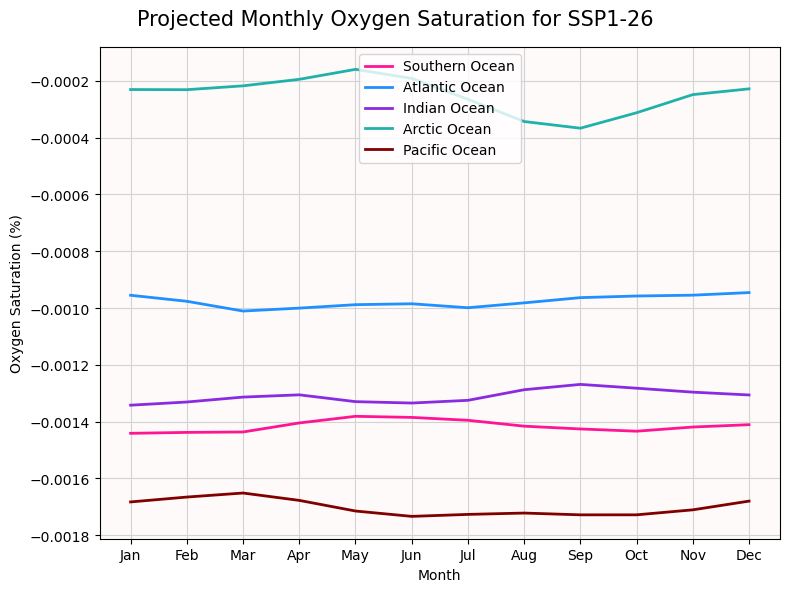

In [30]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Projected Monthly Oxygen Saturation for SSP1-26', fontsize=15)

ax.grid(color='lightgrey')

ax.plot(southern_diff['month'], southern_diff, linewidth=2, label='Southern Ocean', color='deeppink')
ax.plot(atlantic_diff['month'], atlantic_diff, linewidth=2, label='Atlantic Ocean', color='dodgerblue')
ax.plot(indian_diff['month'], indian_diff, linewidth=2, label='Indian Ocean', color='blueviolet')
ax.plot(arctic_diff['month'], arctic_diff, linewidth=2, label='Arctic Ocean', color='lightseagreen')
ax.plot(pacific_diff['month'], pacific_diff, linewidth=2, label='Pacific Ocean', color='maroon')

ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.legend()
ax.set_ylabel('Oxygen Saturation (%)')
ax.set_xlabel('Month')

ax.set_facecolor('snow')

plt.tight_layout()

In [31]:
start_AOU=AOU.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='latitude').mean(dim='longitude')

In [32]:
end_AOU=AOU.sel(time=slice('2081-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='latitude').mean(dim='longitude')

In [33]:
start_AOU_upper=start_AOU.sel(lev=slice(0,1000))
start_AOU_middle=start_AOU.sel(lev=slice(1000, 3000))
start_AOU_lower=start_AOU.sel(lev=slice(3000, 6500))
end_AOU_upper=end_AOU.sel(lev=slice(0,1000))
end_AOU_middle=end_AOU.sel(lev=slice(1000, 3000))
end_AOU_lower=end_AOU.sel(lev=slice(3000, 6500))

In [34]:
start_avg_upper=start_AOU_upper.mean(dim='lev')
start_std_upper=start_AOU_upper.std(dim='lev')
start_avg_middle=start_AOU_middle.mean(dim='lev')
start_std_middle=start_AOU_middle.std(dim='lev')
start_avg_lower=start_AOU_lower.mean(dim='lev')
start_std_lower=start_AOU_lower.std(dim='lev')

end_avg_upper=end_AOU_upper.mean(dim='lev')
end_std_upper=end_AOU_upper.std(dim='lev')
end_avg_middle=end_AOU_middle.mean(dim='lev')
end_std_middle=end_AOU_middle.std(dim='lev')
end_avg_lower=end_AOU_lower.mean(dim='lev')
end_std_lower=end_AOU_lower.std(dim='lev')

CPU times: user 5min 11s, sys: 1min 33s, total: 6min 44s
Wall time: 1min 46s


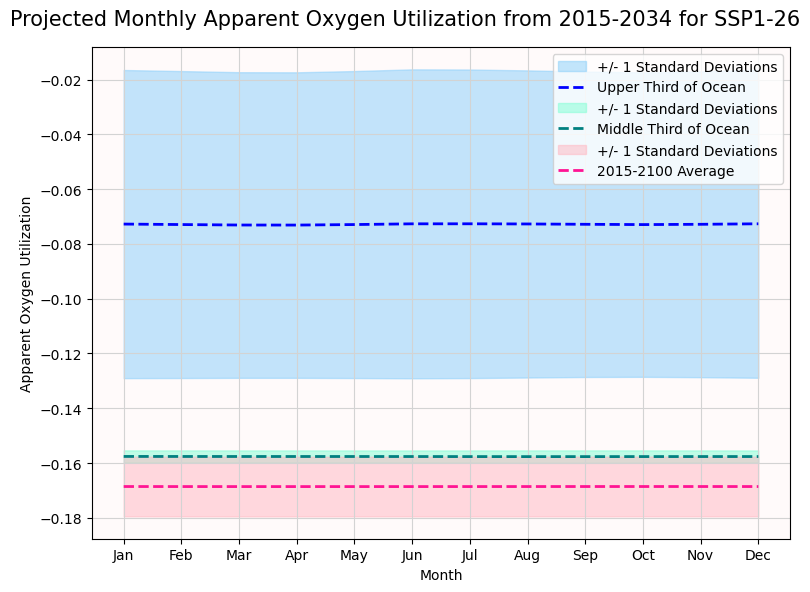

In [36]:
%%time
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Projected Monthly Apparent Oxygen Utilization from 2015-2034 for SSP1-26', fontsize=15)

ax.grid(color='lightgrey')

ax.fill_between(start_avg_upper['month'], start_avg_upper+start_std_upper,start_avg_upper-start_std_upper, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='lightskyblue')
#ax.fill_between(avg_upper['month'], avg_upper+(2*std_upper),avg_upper-(2*std_upper), 
               # label='+/- 2 Standard Deviations',alpha=0.3, color='lightskyblue')
ax.plot(start_avg_upper['month'], 
        start_avg_upper, linewidth=2, linestyle='--',
        label='Upper Third of Ocean', color='blue')

ax.fill_between(start_avg_middle['month'], start_avg_middle+start_std_middle,start_avg_middle-start_std_middle, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='aquamarine')
#ax.fill_between(avg_middle['month'], avg_middle+(2*std_middle),avg_middle-(2*std_middle), 
               # label='+/- 2 Standard Deviations',alpha=0.3, color='aquamarine')
ax.plot(start_avg_middle['month'], 
        start_avg_middle, linewidth=2, linestyle='--',
        label='Middle Third of Ocean', color='teal')

ax.fill_between(start_avg_lower['month'], start_avg_lower+start_std_lower,start_avg_lower-start_std_lower, 
              label='+/- 1 Standard Deviations',alpha=0.5, color='lightpink')
#ax.fill_between(avg_lower['month'], avg_lower+(2*std_lower),avg_lower-(2*std_lower), 
               # label='+/- 2 Standard Deviations',alpha=0.3, color='lightpink')
ax.plot(start_avg_lower['month'], 
        start_avg_lower, linewidth=2, linestyle='--',
        label='2015-2100 Average', color='deeppink')


ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.legend()
ax.set_ylabel('Apparent Oxygen Utilization')
ax.set_xlabel('Month')

ax.set_facecolor('snow')

plt.tight_layout()

CPU times: user 5min 18s, sys: 1min 29s, total: 6min 48s
Wall time: 1min 47s


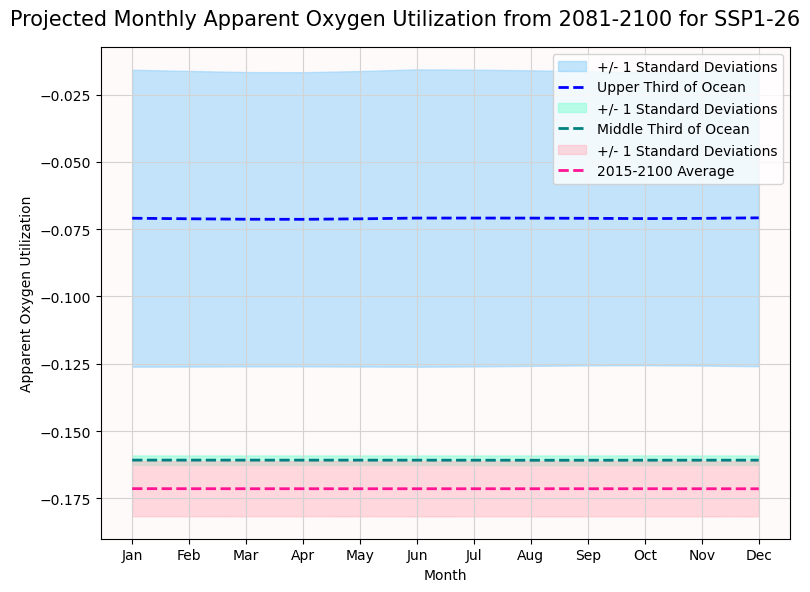

In [37]:
%%time
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Projected Monthly Apparent Oxygen Utilization from 2081-2100 for SSP1-26', fontsize=15)

ax.grid(color='lightgrey')

ax.fill_between(end_avg_upper['month'], end_avg_upper+end_std_upper,end_avg_upper-end_std_upper, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='lightskyblue')
ax.plot(end_avg_upper['month'], 
        end_avg_upper, linewidth=2, linestyle='--',
        label='Upper Third of Ocean', color='blue')

ax.fill_between(end_avg_middle['month'], end_avg_middle+end_std_middle,end_avg_middle-end_std_middle, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='aquamarine')
ax.plot(end_avg_middle['month'], 
        end_avg_middle, linewidth=2, linestyle='--',
        label='Middle Third of Ocean', color='teal')

ax.fill_between(end_avg_lower['month'], end_avg_lower+end_std_lower,end_avg_lower-end_std_lower, 
              label='+/- 1 Standard Deviations',alpha=0.5, color='lightpink')
ax.plot(end_avg_lower['month'], 
        end_avg_lower, linewidth=2, linestyle='--',
        label='2015-2100 Average', color='deeppink')


ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.legend()
ax.set_ylabel('Apparent Oxygen Utilization')
ax.set_xlabel('Month')

ax.set_facecolor('snow')

plt.tight_layout()

In [ ]:
A16_temp.sel(lat=slice(-80,75)).plot.contourf(yincrease=False,
             vmin=-2,
             vmax=30,levels=40,cmap=cmocean.cm.thermal)

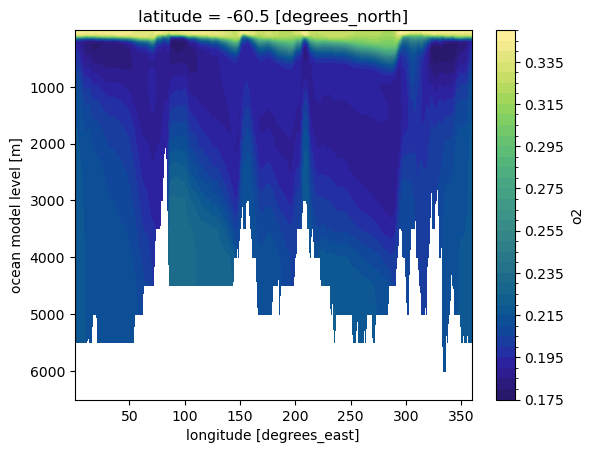

In [39]:
southern_zonal=O2.sel(latitude='-60.5').mean(dim='time')
southern_zonal.plot.contourf(yincrease=False, levels=40, 
                            cmap=cmocean.cm.haline)